In [2]:
import uproot, pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [3]:
## Read Electron Total Energy Nonlinearity:
Etrue = np.arange(0.01, 8, 0.01);
df = pd.read_table('../../../Simulation/Nonlinearity/electron/Calc_NonL.txt');
electron_NL = df['nonl'].values

In [123]:
electron_NL[0]

0.6828839513932179

In [8]:
## Read Electron Total Resolution
df = pd.read_table("../../../Simulation/Nonlinearity/electron/Cerenkov/totPE_smearing.txt", sep=' ')
electron_totpe = df['totpe'].values
electron_sigma = df['sigma'].values

In [9]:
## choose energy scale: 
A = 1481.06

In [199]:
## read primary e+- info for gamma  ===> binning in 10keV
bincont1 = [[]for i in range(800)]
with open('../../../Reconstruction/energy_model/gamma/log_2MeV') as f:
    for lines in f.readlines():
        line = lines.strip(' \n')
        data = line.split(' ')
        KE = [];
        for i in range(len(data)):
            KE.append(float(data[i]))
        cont, edge = np.histogram(KE, bins=800, range=(0,8))
        for j in range(800):
            bincont1[j].append(cont[j])
bincon1 = np.array(bincont1)

In [252]:
### ead primary e+- info for gamma  ===> no-binning
bincont2 = [[] for i in range(5000)]
evtId = 0
with open('../../../Reconstruction/energy_model/gamma/log_6MeV') as f:
    for lines in f.readlines():
        line = lines.strip(' \n')
        data = line.split(' ')
        if(evtId < 5000):
            for i in range(len(data)):
                bincont2[evtId].append(float(data[i]))
            evtId+=1

In [218]:
### find the corresponding bin for energy:
def find_bin_Idx(xx, Etrue):
    if(xx<=Etrue[0]):   # in the first bin
        return int(0)
    for i in range(798):
        if(xx > Etrue[i] and xx <= Etrue[i+1] ):
            return int(i+1)

In [130]:
# for single event
mean_dist = []; sigma_dist =[]; Evis_dist = []; Edep_dist = [];
for i in range(20):
    mean_evt = 0.; sigma_evt = 0.; Evis_evt = 0.; Edep_evt = 0.;
    for j in range(799):
        #mean_evt += electron_totpe[i]*bincon1[j,i]
        Edep_evt += Etrue[j] *bincon1[j,i];
        Evis_evt += Etrue[j] *electron_NL[j] * bincon1[j,i];
        mean_evt += Etrue[j] *electron_NL[j] * bincon1[j,i] * A
        sigma_evt += bincon1[j,i]**2 * electron_sigma[j]**2
    sigma_evt = np.sqrt(sigma_evt)
    mean_dist.append(mean_evt); sigma_dist.append(sigma_evt); Evis_dist.append(Evis_evt); Edep_dist.append(Edep_evt)
    print("Event" + str(i) + " =====> Average: " + str(round(mean_evt, 2))+ " =====> Sigma: " + str(round(sigma_evt, 2)))

0.6828839513932179
0.7801173039059341
0.8235125534825679
0.8490409175150136
0.8661604869890588
0.8785531933455585
0.8880215119728626
0.8955272228983154
0.901644500734409
0.9067399081206454
0.9110590578284372
0.9147732162705229
0.9180056831664359
0.9208476859785196
0.923368497359868
0.9256215565384792
0.9276487794404584
0.9294835983394965
0.9311530385339792
0.9326791707963
0.9349367544096948
0.9367549326443512
0.9384922393193488
0.9402021120780528
0.9418797622508436
0.9434515369788836
0.9451064587300186
0.9466229459704946
0.9480931209486906
0.9495320649360668
0.9508109272709996
0.9522774912491071
0.953639458733378
0.955024813368718
0.9563301050071122
0.9573855499153784
0.9585326469416988
0.9597171458337378
0.9610291567124988
0.9620283404194012
0.9631482748321906
0.9641093159489816
0.9650258905640862
0.9661146358239058
0.9671899121961708
0.9680934713736012
0.9689713616151244
0.9700035029471672
0.9707709518145056
0.9715953601945241
0.9725585578468808
0.9732573739207814
0.9739982908992952


1.025835230585298
1.0260857325954869
1.0261407392833521
1.0259516221211922
1.0261359052158765
1.0260600503138266
1.026235384028864
1.0260651454460084
1.0261619093426315
1.0259197791976566
1.0261909874795407
1.0264941937344558
1.0261991783635178
1.0264846797386986
1.0265913973969332
1.0266890149367356
1.0263486492636795
1.0261828419762078
1.0266959127505235
1.026739928953148
1.0268474416881614
1.026763621494669
1.026687099563472
1.026895576520015
1.0265182201811804
1.0271510581397798
1.0272996618588195
1.0271357338776523
1.027322083997411
1.0273656485790508
1.0269195704081844
1.0271404877046453
1.0271151195338044
1.027405661737932
1.027013809884492
1.0271352206925777
1.026975642256891
1.0274347824959311
1.0272752398289808
1.0274398048228046
1.0277879142046675
1.027787001667655
1.0271245807583744
1.0274665598676072
1.0274656132001112
1.027470394500847
1.0276040159444009
1.027555364077265
1.0276448092287034
1.0277002675754403
1.0276674911228971
1.028072923905616
1.0275701973250515
1.02779

1.02080587922246
1.020430018428907
1.0204660554016405
1.0204825930732957
1.020231535468353
1.0206296459782314
1.021297900960996
1.0212833468515623
1.0211564527564547
1.0215740381812033
1.020915186775735
1.021388713742988
1.02101775513312
1.0213690947443574
1.0212432695688392
1.0221342623540774
1.0213423056695137
1.0219004793392563
1.021469803541227
1.021929545856685
1.0218664394895152
1.0220493623643807
1.0219741678684082
1.0222780914508207
1.0217041327125411
1.0223981591040854
1.0222127170206692
1.0225340367409856
1.022327324425687
1.0225367240452157
1.02249335144882
1.0228639728028777
1.0227877069376032
1.023054705478572
1.0228599692930571
1.0234332421694208
1.0229701856012126
1.0229228612434536
1.0227658445858834
1.0230284684276223
1.0234662628048388
1.0229258422893064
1.0231783219898871
1.0235963114911713
1.0234651042424403
1.0232540025870358
1.023981127939756
1.023419597853502
1.0236665726327467
1.024257319622672
1.023730184304595
1.0236095321858696
1.0241175069128097
1.0237537071

1.0076959523596265
1.0079946987733086
1.0081914728339538
1.0086098896174835
1.0084322633740108
1.0086338392776328
1.0089599661329471
1.0090451557927245
1.0092731521590057
1.0094070213821558
1.0096344399671202
1.0098750588296952
1.0099643118340371
1.0100680067496453
1.0104114485253908
1.010509897679848
1.0108484933527355
1.0107760438024365
1.0112373517131723
1.0112080034521156
1.0113267397715924
1.011718384790787
1.011746801839825
1.0117396808167074
1.0118995279752472
1.0121529082854437
1.0124651999742684
1.0125208059466015
1.0126382449686897
1.0128284900015188
1.0131150807367229
1.0131435084558724
1.0133578193626038
1.0135112873650616
1.0133587007844913
1.0139003283298798
1.0137429766244157
1.0139244539546366
1.0143845726889738
1.014288756388178
1.014438292622076
1.0146564339571842
1.0146993809913107
1.0148317878577402
1.0148045015909517
1.0150322684812734
1.0152333907515252
1.0152305072314844
1.0154659183089
1.015470416201265
1.01570770819801
1.0157105020339294
1.0161406928837693
1.01

0.955024813368718
0.9563301050071122
0.9573855499153784
0.9585326469416988
0.9597171458337378
0.9610291567124988
0.9620283404194012
0.9631482748321906
0.9641093159489816
0.9650258905640862
0.9661146358239058
0.9671899121961708
0.9680934713736012
0.9689713616151244
0.9700035029471672
0.9707709518145056
0.9715953601945241
0.9725585578468808
0.9732573739207814
0.9739982908992952
0.9747865096346938
0.9755029365603478
0.9763879158609088
0.9772643138467728
0.9779425101983032
0.9786133170802084
0.9793838563953338
0.97986403397862
0.9805573420271372
0.9813614152758872
0.9818226644607946
0.9825406771054
0.9831105789425452
0.9837393383564562
0.984236361406036
0.984887298678312
0.98543624206187
0.9859306507045524
0.986440711851139
0.9870777254141154
0.9876389798023174
0.9880455442791716
0.9886415084291462
0.9891723078277632
0.9896535129218522
0.9900948803008068
0.9904273513779208
0.9911980771689141
0.991544789254596
0.992047836997394
0.9921712253310244
0.9927561283480696
0.9933913934224279
0.9937

1.0287775454761754
1.0293385016094754
1.0292139423006623
1.0290311965082102
1.0291696983451126
1.0287394748675909
1.0288249176474784
1.0292687179496094
1.0289256090707006
1.0288396132332944
1.0290612953264
1.0286683140198905
1.0291021212580147
1.0290613249603415
1.0290340036333114
1.0293018304637462
1.0294440626557355
1.0292561404233278
1.0292010876975952
1.0292168220365787
1.0295330091089288
1.029382581779071
1.0291685317851147
1.0294492889128637
1.029460092686113
1.0288453449575004
1.029730117188055
1.029873857450435
1.029514973644138
1.0295453569705617
1.0294231643473934
1.0297696528256546
1.0293792648463542
1.0295118230838567
1.029638576897437
1.0297128643088158
1.029980548786287
1.0302337438482834
1.0296419331543285
1.0298299970370468
1.029645514894154
1.0296484752561603
1.0295281146605928
1.0296732049449435
1.0296453446691856
1.0298127853601908
1.029601256791807
1.0298989044363618
1.029936126470649
1.0293643863879482
1.0298885653226502
1.0298252891554658
1.0298225877656957
1.0299

1.0262370947476247
1.0260397443717797
1.0260430569949637
1.025835230585298
1.0260857325954869
1.0261407392833521
1.0259516221211922
1.0261359052158765
1.0260600503138266
1.026235384028864
1.0260651454460084
1.0261619093426315
1.0259197791976566
1.0261909874795407
1.0264941937344558
1.0261991783635178
1.0264846797386986
1.0265913973969332
1.0266890149367356
1.0263486492636795
1.0261828419762078
1.0266959127505235
1.026739928953148
1.0268474416881614
1.026763621494669
1.026687099563472
1.026895576520015
1.0265182201811804
1.0271510581397798
1.0272996618588195
1.0271357338776523
1.027322083997411
1.0273656485790508
1.0269195704081844
1.0271404877046453
1.0271151195338044
1.027405661737932
1.027013809884492
1.0271352206925777
1.026975642256891
1.0274347824959311
1.0272752398289808
1.0274398048228046
1.0277879142046675
1.027787001667655
1.0271245807583744
1.0274665598676072
1.0274656132001112
1.027470394500847
1.0276040159444009
1.027555364077265
1.0276448092287034
1.0277002675754403
1.0276

1.0202640394578508
1.020442377948637
1.02080587922246
1.020430018428907
1.0204660554016405
1.0204825930732957
1.020231535468353
1.0206296459782314
1.021297900960996
1.0212833468515623
1.0211564527564547
1.0215740381812033
1.020915186775735
1.021388713742988
1.02101775513312
1.0213690947443574
1.0212432695688392
1.0221342623540774
1.0213423056695137
1.0219004793392563
1.021469803541227
1.021929545856685
1.0218664394895152
1.0220493623643807
1.0219741678684082
1.0222780914508207
1.0217041327125411
1.0223981591040854
1.0222127170206692
1.0225340367409856
1.022327324425687
1.0225367240452157
1.02249335144882
1.0228639728028777
1.0227877069376032
1.023054705478572
1.0228599692930571
1.0234332421694208
1.0229701856012126
1.0229228612434536
1.0227658445858834
1.0230284684276223
1.0234662628048388
1.0229258422893064
1.0231783219898871
1.0235963114911713
1.0234651042424403
1.0232540025870358
1.023981127939756
1.023419597853502
1.0236665726327467
1.024257319622672
1.023730184304595
1.02360953218

1.007274653479174
1.0074029424860114
1.0076959523596265
1.0079946987733086
1.0081914728339538
1.0086098896174835
1.0084322633740108
1.0086338392776328
1.0089599661329471
1.0090451557927245
1.0092731521590057
1.0094070213821558
1.0096344399671202
1.0098750588296952
1.0099643118340371
1.0100680067496453
1.0104114485253908
1.010509897679848
1.0108484933527355
1.0107760438024365
1.0112373517131723
1.0112080034521156
1.0113267397715924
1.011718384790787
1.011746801839825
1.0117396808167074
1.0118995279752472
1.0121529082854437
1.0124651999742684
1.0125208059466015
1.0126382449686897
1.0128284900015188
1.0131150807367229
1.0131435084558724
1.0133578193626038
1.0135112873650616
1.0133587007844913
1.0139003283298798
1.0137429766244157
1.0139244539546366
1.0143845726889738
1.014288756388178
1.014438292622076
1.0146564339571842
1.0146993809913107
1.0148317878577402
1.0148045015909517
1.0150322684812734
1.0152333907515252
1.0152305072314844
1.0154659183089
1.015470416201265
1.01570770819801
1.015

1.0308790623781587
1.030604907031866
1.0303755134823107
1.0302086880155936
1.0305365233367012
1.0307709637635865
1.0309263107823428
1.0308737302576696
1.030574553512707
1.0306404724734404
1.0309186884454309
1.0310038259523244
1.030708301343621
1.030867810092147
1.0307549034590648
1.0310915592768153
1.0308950944884083
1.0306701724461595
1.0305727515254413
1.030673584614255
1.0306586109079197
1.031291254782556
1.0305609678833645
1.0307564571751835
1.030595282725252
1.0309647447924188
1.0307260978957569
1.031153065147648
1.0309315835465538
1.0308720085019558
1.031186105266967
1.0308760595078148
1.0310656084810632
1.03106194727317
1.0306794010024565
1.0307327944089135
1.0309772781637478
1.0313113704815968
1.0314099136023
1.0308555725794657
1.0311097993765854
1.031126172790652
1.0308859930889451
1.0312474617261758
1.030956780006128
1.030827763418514
1.0313559589111356
1.0308589362258804
1.0311881084337498
1.0307314604197988
1.030975696654946
1.0310621231760195
1.0314313973695413
1.030997347

1.0309263107823428
1.0308737302576696
1.030574553512707
1.0306404724734404
1.0309186884454309
1.0310038259523244
1.030708301343621
1.030867810092147
1.0307549034590648
1.0310915592768153
1.0308950944884083
1.0306701724461595
1.0305727515254413
1.030673584614255
1.0306586109079197
1.031291254782556
1.0305609678833645
1.0307564571751835
1.030595282725252
1.0309647447924188
1.0307260978957569
1.031153065147648
1.0309315835465538
1.0308720085019558
1.031186105266967
1.0308760595078148
1.0310656084810632
1.03106194727317
1.0306794010024565
1.0307327944089135
1.0309772781637478
1.0313113704815968
1.0314099136023
1.0308555725794657
1.0311097993765854
1.031126172790652
1.0308859930889451
1.0312474617261758
1.030956780006128
1.030827763418514
1.0313559589111356
1.0308589362258804
1.0311881084337498
1.0307314604197988
1.030975696654946
1.0310621231760195
1.0314313973695413
1.0309973471315104
1.031045795510081
1.0312498630018287
1.0312047604146801
1.030963433707464
1.031468389768712
1.03134868193

In [132]:
np.array(Evis_dist) / np.array(Edep_dist)

array([0.91618735, 0.9441501 , 0.91447503, 0.93835824, 0.90943252,
       0.89592013, 0.92557211, 0.89792119, 0.92371325, 0.90713159,
       0.90103288, 0.91203845, 0.91392779, 0.89616165, 0.90509722,
       0.89225935, 0.92521081, 0.87092156, 0.92417939, 0.92545713])

In [52]:
def gauss_dist(x, mean, sigma):
    return np.exp(-(x-mean)**2/2/sigma**2)

Text(0.5, 0, 'totalPE')

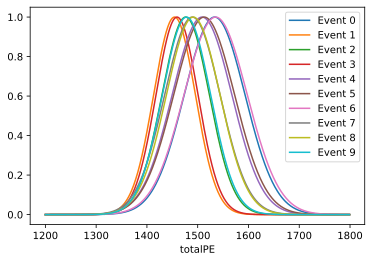

In [66]:
xx = np.arange(1200,1800,1)
for j in range(10):
    for i in range(len(xx)):
        yy = gauss_dist(xx, mean_dist[j], sigma_dist[j])
    plt.plot(xx, yy, '-', label='Event %d' %j)
plt.legend()
plt.xlabel("totalPE")

In [201]:
gamma_totpe = 0.; gamma_sigma = 0.; gamma_Evis = 0.; count = 0;

In [202]:
## Predict with 1000 events with binning data
mean_dist = []; sigma_dist =[];
iterator = 10000;
for i in range(iterator):
    mean_evt = 0.; sigma_evt = 0.; Evis_evt = 0.
    for j in range(799):
        count += bincon1[j,i]
        #mean_evt += electron_totpe[i]*bincon1[j,i]
        
        Evis_evt += Etrue[j] *electron_NL[j] * bincon1[j,i]
        mean_evt += Etrue[j] *electron_NL[j] * bincon1[j,i] * A
        sigma_evt += bincon1[j,i]**2 * electron_sigma[j]**2
        
        gamma_Evis += Etrue[j] *electron_NL[j] * bincon1[j,i]
        gamma_totpe += Etrue[j] *electron_NL[j] * bincon1[j,i]*A
        gamma_sigma += bincon1[j,i]/100 * electron_sigma[j]**2
     
        
    sigma_evt = np.sqrt(sigma_evt)
    gamma_totpe /= iterator; gamma_Evis /= iterator;
    gamma_sigma = np.sqrt(gamma_sigma)
    mean_dist.append(mean_evt); sigma_dist.append(sigma_evt)
print(count)
    #print("Event" + str(i) + " =====> Average: " + str(round(mean_evt, 2))+ " =====> Sigma: " + str(round(sigma_evt, 2)))
print("1MeV gamma: Evis " + str(gamma_Evis) + " ===> totalPE " + str(gamma_totpe) + " ===> sigma " + str(gamma_sigma))

183968
1MeV gamma: Evis 0.00020668744671672532 ===> totalPE 0.3061165098342732 ===> sigma 6.340942210032763


In [264]:
## Predict with unbinning data
mean_dist = []; sigma_dist = []; Evis_dist = [];
iterator = 5000;   # evt number

for i in range(5000):
    mean_evt = 0.; sigma_evt = 0.; Evis_evt = 0.
    for j in range(len(bincont2[i])):
        bin_idx = find_bin_Idx(bincont2[i][j], Etrue)
        Evis_evt += bincont2[i][j] #*electron_NL[bin_idx]
        mean_evt += bincont2[i][j] *electron_NL[bin_idx] * A
        sigma_evt += electron_sigma[j]**2
        
    sigma_evt = np.sqrt(sigma_evt)
    mean_dist.append(mean_evt); sigma_dist.append(sigma_evt); Evis_dist.append(Evis_evt)
    #print("Event" + str(i) + " =====> Average: " + str(round(mean_evt, 2))+ " =====> Sigma: " + str(round(sigma_evt, 2)))



0.0371722 0.8490409175150136  0.03156071879405159
0.00615518 0.6828839513932179  0.004203273639936507
0.000398799 0.6828839513932179  0.0002723334369316639
2.3794e-05 0.6828839513932179  1.6248540739450227e-05
0.00355422 0.6828839513932179  0.0024271197977208028
0.000180647 0.6828839513932179  0.00012336093716733065
0.00365865 0.6828839513932179  0.0024984333687647965
0.00708461 0.6828839513932179  0.004837966470879905
0.0076935 0.6828839513932179  0.005253767680043721
0.0250796 0.8235125534825679  0.02065336543632141
0.00288526 0.6828839513932179  0.001970297749596796
0.00843561 0.6828839513932179  0.005760542689212143
0.00305826 0.6828839513932179  0.0020884366731878227
0.00283582 0.6828839513932179  0.0019365359670399152
0.0110155 0.7801173039059341  0.008593382161175818
0.00418865 0.6828839513932179  0.0028603618630032024
0.0410569 0.8661604869890588  0.03556186449826109
0.129359 0.9180056831664359  0.11875229716872698
0.156727 0.9256215565384792  0.14506988969160622
0.530392 0.974

0.000327793 0.6828839513932179  0.00022384457907903706
0.00137458 0.6828839513932179  0.0009386786219060894
0.00999817 0.6828839513932179  0.00682758983630113
0.0161121 0.7801173039059341  0.012569328012262801
0.043148 0.8661604869890588  0.03737309269260391
0.0603463 0.8880215119728626  0.05358881256796796
0.372299 0.9597171458337378  0.3573017336767547
0.112025 0.9147732162705229  0.10247746955270533
0.168775 0.9276487794404584  0.15656392275006337
0.0483046 0.8661604869890588  0.04183953585981169
0.902848 0.9952354964800328  0.8985463775260046
0.324941 0.953639458733378  0.3098765593602826
3.88084 1.0277948427446617  3.988707337517193
4.2368 1.0287715422163084  4.358699270062055
1.7632 1.0146993809913107  1.7891179485638793
0.0539334 0.8785531933455585  0.047383360797983345
0.0114214 0.7801173039059341  0.008910031774831236
0.0198329 0.7801173039059341  0.015471988476636002
0.034536 0.8490409175150136  0.029322477127298508
0.00479834 0.6828839513932179  0.003276709379328133
0.001010

0.018762 0.7801173039059341  0.014636560855883137
0.0288302 0.8235125534825679  0.02374203161941313
0.0144922 0.7801173039059341  0.01130561599166558
0.00152087 0.6828839513932179  0.0010385777151554032
0.135859 0.9208476859785196  0.1251054457693557
0.552965 0.9763879158609088  0.5399083438940274
0.560515 0.9772643138467728  0.5477713068758239
0.318966 0.9522774912491071  0.30374414227376273
0.0763517 0.8955272228983154  0.0683750258645653
3.66948 1.0271404877046453  3.769071476822442
0.00778984 0.6828839513932179  0.0053195567199209445
0.539524 0.9747865096346938  0.5259207168241485
0.0422409 0.8661604869890588  0.03658739851485613
0.00578198 0.6828839513932179  0.003948421349276558
0.00203066 0.6828839513932179  0.001386705124736152
0.0110812 0.7801173039059341  0.008644635868042438
0.00950122 0.6828839513932179  0.0064882306566562695
0.0307663 0.8490409175150136  0.026121847580542163
0.00417645 0.6828839513932179  0.0028520306787962048
0.0437176 0.8661604869890588  0.03786645770599

0.847117 0.9927561283480696  0.8409805931778317
5.15288 1.0304316123718906  5.309690446758867
0.028273 0.8235125534825679  0.023283170424612643
0.00273917 0.6828839513932179  0.0018705352331377606
0.00432227 0.6828839513932179  0.0029516088165883634
0.00283684 0.6828839513932179  0.0019372325086703364
0.0042776 0.6828839513932179  0.002921104390479629
0.00592464 0.6828839513932179  0.004045841573782315
0.0100204 0.7801173039059341  0.007817087432059023
0.000720639 0.6828839513932179  0.0004921128078480572
0.00446316 0.6828839513932179  0.0030478203365001543
0.000529984 0.6828839513932179  0.0003619175680951832
0.00584305 0.6828839513932179  0.0039901250721881415
0.0136042 0.7801173039059341  0.010612871825797109
0.0141979 0.7801173039059341  0.011076027469126061
0.0552514 0.8785531933455585  0.04854129390681279
0.178479 0.9294835983394965  0.165893303148035
0.0101721 0.7801173039059341  0.007935431227061553
0.265325 0.9451064587300186  0.2507603711625422
0.00613134 0.6828839513932179  

0.00934593 0.6828839513932179  0.0063821856078444174
0.0109624 0.7801173039059341  0.008551957932338414
0.0582239 0.8785531933455585  0.051152793274032465
0.194433 0.9326791707963  0.181343609215437
0.202487 0.9349367544096948  0.18931253859015587
0.179683 0.9294835983394965  0.16701240140043574
0.0308043 0.8490409175150136  0.026154111135407734
0.0541367 0.8785531933455585  0.0475619706621905
0.0973828 0.9067399081206454  0.0883008711245312
4.93112 1.0296983056401947  5.077565908908477
0.154216 0.9256215565384792  0.1427456539631381
3.35744 1.025835230585298  3.444180236576303
2.64256 1.02249335144882  2.7020000308045935
0.0625588 0.8880215119728626  0.055553560163207914
0.00127048 0.6828839513932179  0.0008675904025660555
0.0153984 0.7801173039059341  0.012012558292465137
0.030085 0.8490409175150136  0.025543396003439186
0.0512059 0.8785531933455585  0.04498710696313333
0.00577571 0.6828839513932179  0.0039441396669013225
0.0766539 0.8955272228983154  0.06864565419132518
0.00702483 0

5.65625 1.0306794010024565  5.829780361920144
0.0296944 0.8235125534825679  0.024453711168132764
0.00188674 0.6828839513932179  0.00128842446645164
0.00275643 0.6828839513932179  0.0018823218101388076
0.000633975 0.6828839513932179  0.0004329313530845153
0.00531781 0.6828839513932179  0.003631447105558368
0.00345481 0.6828839513932179  0.002359234304112803
0.00244763 0.6828839513932179  0.001671447245948582
0.00111842 0.6828839513932179  0.0007637510689172027
0.0025335 0.6828839513932179  0.0017300864908547176
0.0119737 0.7801173039059341  0.009340890561778484
0.0137397 0.7801173039059341  0.010718577720476364
0.0154487 0.7801173039059341  0.012051798192851603
0.0088247 0.6828839513932179  0.006026246005859729
0.00703676 0.6828839513932179  0.0048052904738057406
0.00961351 0.6828839513932179  0.006564911695558215
0.0825851 0.901644500734409  0.07446240125760124
0.683063 0.984887298678312  0.6727400728971038
5.11681 1.0302665792387904  5.271678335314835
0.0431588 0.8661604869890588  0.0

1.53015 1.0112080034521156  1.5472999264822547
0.856591 0.9933913934224279  0.8509301270831109
1.5289 1.0112373517131723  1.546080787034269
0.908056 0.9952354964800328  0.9037295639916727
0.0341101 0.8490409175150136  0.028960870600528866
0.00107691 0.6828839513932179  0.0007354045560948703
0.00249829 0.6828839513932179  0.0017060421469261623
0.00143142 0.6828839513932179  0.00097749374570328
0.00593646 0.6828839513932179  0.004053913262087782
0.0077383 0.6828839513932179  0.005284360881066138
0.00754634 0.6828839513932179  0.005153274477756696
0.00523474 0.6828839513932179  0.0035747199357161336
0.00279129 0.6828839513932179  0.0019061271446843752
0.0044456 0.6828839513932179  0.0030358288943136895
0.0210741 0.8235125534825679  0.01735478590334698
0.00918702 0.6828839513932179  0.006273668519128521
0.0114404 0.7801173039059341  0.008924854003605449
0.00331783 0.6828839513932179  0.00226569286045096
0.0194306 0.7801173039059341  0.015158147285274643
0.0415891 0.8661604869890588  0.0360

0.00505755 0.6828839513932179  0.003453719728368769
0.00300127 0.6828839513932179  0.002049519116797923
0.00670923 0.6828839513932179  0.0045816254932059194
0.0115185 0.7801173039059341  0.008985781165040502
0.00455766 0.6828839513932179  0.0031123528699068133
0.00094576 0.6828839513932179  0.0006458443258696498
0.0302861 0.8490409175150136  0.025714138131951454
0.00737634 0.6828839513932179  0.005037184206019849
0.0132515 0.7801173039059341  0.010337724452709486
0.000142031 0.6828839513932179  9.699069050033014e-05
0.0332283 0.8490409175150136  0.02821218631946413
0.144497 0.923368497359868  0.13342397776300885
0.0773429 0.8955272228983154  0.06926267244790213
1.95488 1.01696492408321  1.9880443907917853
3.31309 1.0262024392983768  3.399901039615059
0.0799581 0.8955272228983154  0.07160465524122579
0.275896 0.9466229459704946  0.2611694843014755
0.0366836 0.8490409175150136  0.03114587740175375
0.00382501 0.6828839513932179  0.0026120379429185724
0.00285284 0.6828839513932179  0.00194

0.101456 0.9110590578284372  0.09243240777104193
0.810456 0.991544789254596  0.8036034237201228
4.4288 1.0288396132332944  4.556524879087614
0.0542141 0.8785531933455585  0.04762997067935544
0.00883493 0.6828839513932179  0.006033231908682483
0.00416929 0.6828839513932179  0.0028471412297042292
0.00790974 0.6828839513932179  0.005401434505692991
0.00559334 0.6828839513932179  0.003819602120685741
0.0177688 0.7801173039059341  0.013861748349643764
0.0361321 0.8490409175150136  0.030677631335744224
0.0648467 0.8880215119728626  0.05758526458045062
0.344113 0.9563301050071122  0.3290856214243124
0.272478 0.9466229459704946  0.2579339270721484
5.18325 1.0304926371781593  5.341300961653694
0.0251607 0.8235125534825679  0.020720152304408847
0.00274955 0.6828839513932179  0.0018776235685532222
0.00200987 0.6828839513932179  0.0013725079673866868
0.00338916 0.6828839513932179  0.002314402972703838
0.000784402 0.6828839513932179  0.0005356555372407429
0.00496392 0.6828839513932179  0.0033897813

0.471473 0.9700035029471672  0.4573304615450097
0.237771 0.9402021120780528  0.22355279639091072
0.647008 0.9825406771054  0.6357116784126107
4.43813 1.0290612953264  4.5671078066269555
0.0374269 0.8490409175150136  0.031776969515742666
0.00569292 0.6828839513932179  0.003887603704565478
0.00626436 0.6828839513932179  0.004277830909749618
0.0111267 0.7801173039059341  0.008680131205370157
0.011394 0.7801173039059341  0.008888656560704214
0.0284743 0.8235125534825679  0.023448943501628683
0.00417338 0.6828839513932179  0.002849934225065428
0.0148271 0.7801173039059341  0.011566877276743676
0.00254503 0.6828839513932179  0.0017379601428142814
0.0583317 0.8785531933455585  0.051247501308275115
0.0525945 0.8785531933455585  0.04620706592741298
0.627378 0.9813614152758872  0.6156845619929555
0.311334 0.9522774912491071  0.2964763604605495
1.72332 1.0143845726889738  1.7481092218063623
3.10354 1.0250363051151448  3.181241174377057
0.0357141 0.8490409175150136  0.030322732232222947
0.00455406

0.00556719 0.6828839513932179  0.0038017447053568087
0.00445287 0.6828839513932179  0.0030407934606403184
0.00566379 0.6828839513932179  0.0038677112950613935
0.00156793 0.6828839513932179  0.001070714233907968
0.00397834 0.6828839513932179  0.002716744539185695
0.00666628 0.6828839513932179  0.004552295627493581
0.0141124 0.7801173039059341  0.011009327439642105
0.0102923 0.7801173039059341  0.008029201326991047
0.0281813 0.8235125534825679  0.02320765432345829
0.0282706 0.8235125534825679  0.023281193994484285
0.00693629 0.6828839513932179  0.0047366811232092635
0.0224417 0.8235125534825679  0.018481021671489743
0.18287 0.9311530385339792  0.1702799561567088
0.00733078 0.6828839513932179  0.005006072013194374
0.0660919 0.8880215119728626  0.058691028967159234
1.16299 1.003584098568031  1.1671582707936345
4.41238 1.0289256090707006  4.540010778951378
0.0276918 0.8235125534825679  0.022804544928528573
0.00283189 0.6828839513932179  0.0019338522331109398
0.00394587 0.6828839513932179  0

4.26281 1.0284651042736677  4.384151331148833
0.0374143 0.8490409175150136  0.03176627160018197
0.000380481 0.6828839513932179  0.00025982436871004294
0.00327854 0.6828839513932179  0.0022388623500007206
0.000331437 0.6828839513932179  0.00022633300819791398
0.00173291 0.6828839513932179  0.0011833764282088214
0.00080172 0.6828839513932179  0.0005474817215109707
0.000109137 0.6828839513932179  7.452790580320162e-05
0.00416955 0.6828839513932179  0.0028473187795315918
0.00534382 0.6828839513932179  0.0036492089171341058
0.00164092 0.6828839513932179  0.001120557933520159
0.00281593 0.6828839513932179  0.001922953405246704
0.0161962 0.7801173039059341  0.012634935877521292
0.00428152 0.6828839513932179  0.00292378129556909
0.0175011 0.7801173039059341  0.013652910947388143
0.00794416 0.6828839513932179  0.005424939371299946
6.39693e-05 0.6828839513932179  4.3683608351858176e-05
0.000495169 0.6828839513932179  0.0003381429633274283
0.0279432 0.8235125534825679  0.023011575984474092
0.0221

1.18112 1.0040413207681942  1.1858932847857295
0.036777 0.8490409175150136  0.031225177823449655
0.000664618 0.6828839513932179  0.00045385696600705764
0.000178494 0.6828839513932179  0.00012189068801998102
0.00599367 0.6828839513932179  0.004092981052946989
0.000815666 0.6828839513932179  0.0005570052210971005
0.0085693 0.6828839513932179  0.005851837444673902
0.00963644 0.6828839513932179  0.00658057022456366
0.000819348 0.6828839513932179  0.0005595195998061303
0.00746721 0.6828839513932179  0.005099237870682951
0.00193582 0.6828839513932179  0.001321940410786019
0.00167317 0.6828839513932179  0.0011425809409525904
0.0193778 0.7801173039059341  0.015116957091628412
0.0549692 0.8785531933455585  0.048293366195650674
0.146637 0.923368497359868  0.13539998634735895
4.23983 1.0287715422163084  4.361816447834971
1.46307 1.0099643118340371  1.4776484857150247
0.0247972 0.8235125534825679  0.02042080549121793
0.00195883 0.6828839513932179  0.001337653570507577
0.00190988 0.6828839513932179

0.00381975 0.6828839513932179  0.002608445973334244
0.0363542 0.8490409175150136  0.030866203323524313
0.0244167 0.8235125534825679  0.020107458964617814
0.00615372 0.6828839513932179  0.004202276629367473
0.158365 0.9256215565384792  0.14658605780121628
0.896918 0.9948723956113056  0.892318959326901
0.0527803 0.8785531933455585  0.04637030111073658
4.73312 1.029645514894154  4.873435779455818
1.00386 0.9987015504884978  1.0025565384733834
4.99614 1.03015751437645  5.146811163876757
0.0528391 0.8785531933455585  0.0464219600385053
0.00274563 0.6828839513932179  0.0018749466634637609
0.00497989 0.6828839513932179  0.003400686960703572
0.00186884 0.6828839513932179  0.0012762008437217013
0.0145275 0.7801173039059341  0.011333154132493459
0.020101 0.8235125534825679  0.0165534258375531
0.0305567 0.8490409175150136  0.025943888604231018
0.00392494 0.6828839513932179  0.0026802785361812968
0.0939949 0.9067399081206454  0.08522892698980926
0.0690653 0.8880215119728626  0.06133147213085934
0.

0.011771 0.7801173039059341  0.009182760784276751
0.0237702 0.8235125534825679  0.019575058098791336
0.0419254 0.8661604869890588  0.036314124881211086
0.0243434 0.8235125534825679  0.020047095494447546
0.0162602 0.7801173039059341  0.01268486338497127
0.0249022 0.8235125534825679  0.020507274309333603
0.00138702 0.6828839513932179  0.0009471736982614212
0.0336286 0.8490409175150136  0.02855205739874539
0.422123 0.9650258905640862  0.40735962400258374
0.044898 0.8661604869890588  0.038888873544834765
0.867651 0.993762769335803  0.8622392605769787
2.65467 1.0228639728028777  2.715366302680615
1.7689 1.0146993809913107  1.7949017350355294
0.0236817 0.8235125534825679  0.01950217723780813
0.00170976 0.6828839513932179  0.0011675676647340684
0.00190111 0.6828839513932179  0.0012982375088331603
0.00332908 0.6828839513932179  0.002273375304904134
0.00182254 0.6828839513932179  0.0012445833167721953
0.00337785 0.6828839513932179  0.002306679555213581
0.0018168 0.6828839513932179  0.0012406635

0.00122784 0.6828839513932179  0.0008384722308786487
0.000889758 0.6828839513932179  0.0006076014588237268
0.00733195 0.6828839513932179  0.005006870987417504
0.0028037 0.6828839513932179  0.0019146017345211652
0.00891821 0.6828839513932179  0.006090102484154509
0.0152458 0.7801173039059341  0.01189351239188909
0.00563471 0.6828839513932179  0.003847853029754879
0.0329094 0.8490409175150136  0.027941427170868588
0.0822862 0.901644500734409  0.07419289971633174
0.0270634 0.8235125534825679  0.02228704963992013
0.0304507 0.8490409175150136  0.025853890266974426
0.384731 0.9610291567124988  0.36973770849115634
0.162405 0.9276487794404584  0.15065480002502765
0.037926 0.8490409175150136  0.03220072583767441
5.15781 1.0304316123718906  5.314770474607861
0.0549023 0.8785531933455585  0.04823459098701586
0.0104616 0.7801173039059341  0.00816127518654232
0.00101089 0.6828839513932179  0.00069032055762389
0.0024234 0.6828839513932179  0.0016549009678063242
0.00717795 0.6828839513932179  0.00490

0.0128692 0.7801173039059341  0.010039485607426249
0.00270982 0.6828839513932179  0.0018504925891643697
0.00851348 0.6828839513932179  0.005813718862507133
0.00574041 0.6828839513932179  0.0039200338634171415
0.0269043 0.8235125534825679  0.022156028792661053
0.0271714 0.8235125534825679  0.022375988995696244
0.020523 0.8235125534825679  0.016900948135122742
0.092116 0.9067399081206454  0.08352525337644137
0.218128 0.9367549326443512  0.20433247994784703
5.53101 1.0305609678833645  5.700043018972568
0.0717746 0.8955272228983154  0.06427610821263742
0.01924 0.7801173039059341  0.015009456927150173
0.0249726 0.8235125534825679  0.020565249593098776
0.0314803 0.8490409175150136  0.026728062795647888
0.0442458 0.8661604869890588  0.0383239636752205
0.0483772 0.8661604869890588  0.0419024191111671
0.505965 0.9725585578468808  0.4920805907209971
0.11505 0.9147732162705229  0.10524465853192366
0.451804 0.9680934713736012  0.4373885027404785
3.19991 1.0257324967211412  3.282251673582947
0.2530

0.000135691 0.6828839513932179  9.266120624849714e-05
0.00143342 0.6828839513932179  0.0009788595136060664
0.00489329 0.6828839513932179  0.0033415492105129192
0.00525977 0.6828839513932179  0.003591812521019506
0.00182674 0.6828839513932179  0.0012474514293680469
0.00878779 0.6828839513932179  0.006001040759213806
0.0022224 0.6828839513932179  0.0015176412935762873
0.00452918 0.6828839513932179  0.0030929043349711347
0.0134918 0.7801173039059341  0.010525186640838083
0.0349776 0.8490409175150136  0.02969741359647314
0.00168617 0.6828839513932179  0.0011514584323207022
0.00465951 0.6828839513932179  0.003181904600356213
0.0301075 0.8490409175150136  0.02556249942408327
0.0459182 0.8661604869890588  0.039772530473661
0.0130799 0.7801173039059341  0.010203856323359229
0.616395 0.9805573420271372  0.6044106428388173
0.000917464 0.6828839513932179  0.0006265214415810273
0.345139 0.9563301050071122  0.3300668161120497
4.83053 1.0298885653226502  4.974907611448022
0.0428909 0.866160486989058

5.72316 1.031126172790652  5.901300067068548
0.0315869 0.8490409175150136  0.026818570557454985
0.00154093 0.6828839513932179  0.0010522763672203513
0.00294481 0.6828839513932179  0.002010963488902262
0.000297086 0.6828839513932179  0.00020287526158360554
0.0048539 0.6828839513932179  0.0033146504116675405
0.0078304 0.6828839513932179  0.005347254492989453
0.00734671 0.6828839513932179  0.005016950354540068
0.0120762 0.7801173039059341  0.009420852585428843
0.00947373 0.6828839513932179  0.00646945817683247
0.0311829 0.8490409175150136  0.02647555802677892
0.0810496 0.901644500734409  0.07307792612672356
0.190823 0.9326791707963  0.17797663740886235
5.618 1.031186105266967  5.793203539389822
0.0242391 0.8235125534825679  0.019961203135119312
0.000676708 0.6828839513932179  0.0004621130329794017
0.00043751 0.6828839513932179  0.00029876855757404676
0.00436449 0.6828839513932179  0.002980440177016186
0.00172152 0.6828839513932179  0.0011755983800024524
0.00472134 0.6828839513932179  0.00

0.00326975 0.6828839513932179  0.0022328598000679743
0.00347939 0.6828839513932179  0.0023760195916380485
0.00286332 0.6828839513932179  0.0019553152757032285
0.00683077 0.6828839513932179  0.004664623208658251
0.00540319 0.6828839513932179  0.0036897517373283215
0.000782519 0.6828839513932179  0.0005343696667602694
0.00257646 0.6828839513932179  0.0017594231854065703
0.0126067 0.7801173039059341  0.00983470481515094
9.07044e-05 0.6828839513932179  6.1940579080751e-05
0.0100013 0.7801173039059341  0.0078021871915544185
0.00160361 0.6828839513932179  0.0010950795332936782
0.024432 0.8235125534825679  0.020120058706686098
0.0514548 0.8785531933455585  0.04520577885295705
0.00600471 0.6828839513932179  0.004100520091770369
0.000800662 0.6828839513932179  0.0005467592302903966
0.16282 0.9276487794404584  0.15103977426849544
1.97457 1.017002066314838  2.0081417700832898
3.69752 1.027013809884492  3.797404102324107
0.0496681 0.8661604869890588  0.04302054568382127
0.0111279 0.780117303905934

3.58439 1.026895576520015  3.6807942355225762
0.0348412 0.8490409175150136  0.029581604415324095
0.00407571 0.6828839513932179  0.0027832369495328518
0.00307403 0.6828839513932179  0.002099205753101294
0.00239087 0.6828839513932179  0.0016326867528675027
0.00469559 0.6828839513932179  0.00320654305332248
0.00265734 0.6828839513932179  0.0018146548393952536
0.00815005 0.6828839513932179  0.005565538348052296
0.0131498 0.7801173039059341  0.010258386522902252
0.0053631 0.6828839513932179  0.003662374919716967
0.0325011 0.8490409175150136  0.02759476376424721
0.0237866 0.8235125534825679  0.019588563704668452
0.0129081 0.7801173039059341  0.01006983217054819
0.0354215 0.8490409175150136  0.030074302859758057
0.0711554 0.8955272228983154  0.06372159775621879
0.742234 0.9880455442791716  0.7333609965125066
0.256026 0.9434515369788836  0.24154812320655564
1.43558 1.0094070213821558  1.4490845317557952
0.267233 0.9451064587300186  0.2525636342857991
3.04341 1.0247704285088353  3.1187965698280

0.0388309 0.8490409175150136  0.032969022963933746
0.00475215 0.6828839513932179  0.0032451669696132806
0.00790654 0.6828839513932179  0.0053992492770485335
0.000712629 0.6828839513932179  0.0004866429073973975
0.00145573 0.6828839513932179  0.000994094654561649
0.00767735 0.6828839513932179  0.005242739104228722
0.0189737 0.7801173039059341  0.014801711689120022
0.0128785 0.7801173039059341  0.010046740698352572
0.04104 0.8661604869890588  0.03554722638603097
0.124438 0.9180056831664359  0.11423479120186494
0.355325 0.9573855499153784  0.3401830205236818
5.38475 1.0308737302576696  5.550997319004987
0.0246091 0.8235125534825679  0.02026590277990786
0.000974008 0.6828839513932179  0.0006651344317286053
0.00152422 0.6828839513932179  0.0010408653763925705
0.00253807 0.6828839513932179  0.0017332072705125844
0.0026367 0.6828839513932179  0.0018005601146384976
0.00198818 0.6828839513932179  0.001357696214480968
0.00134316 0.6828839513932179  0.0009172224081533145
0.00624531 0.682883951393

0.197568 0.9326791707963  0.1842675584158834
0.19426 0.9326791707963  0.18118225571888924
0.0618579 0.8880215119728626  0.05493114588546614
0.169881 0.9276487794404584  0.1575899023001245
3.27352 1.0259958726482263  3.3586180090314217
0.332657 0.955024813368718  0.3176956893407976
1.27893 1.0060871180241773  1.286714997854661
0.020932 0.8235125534825679  0.01723776476949711
0.00156101 0.6828839513932179  0.0010659886769643272
0.00203994 0.6828839513932179  0.001393042287805081
0.000489145 0.6828839513932179  0.0003340292704042355
0.000333445 0.6828839513932179  0.00022770423917231153
0.00166413 0.6828839513932179  0.0011364076700319957
0.00267781 0.6828839513932179  0.0018286334738802728
0.00280984 0.6828839513932179  0.0019187946419827195
0.00181668 0.6828839513932179  0.001240581616817031
0.000137434 0.6828839513932179  9.385147297577551e-05
0.00371801 0.6828839513932179  0.002538969360119498
0.000539331 0.6828839513932179  0.0003683004843888556
0.0054352 0.6828839513932179  0.003711

0.000346905 0.6828839513932179  0.00023689585715806424
0.000471774 0.6828839513932179  0.000322166893284584
0.00076925 0.6828839513932179  0.0005253084796092328
0.000769696 0.6828839513932179  0.0005256130458515543
0.00147006 0.6828839513932179  0.001003880381585114
0.000314407 0.6828839513932179  0.00021470349450568746
0.00252828 0.6828839513932179  0.0017265218366284449
0.0011466 0.6828839513932179  0.0007829947386674636
0.00527747 0.6828839513932179  0.0036038995669591656
0.00336231 0.6828839513932179  0.00229606753860893
0.0086148 0.6828839513932179  0.005882908664462294
0.0114925 0.7801173039059341  0.008965498115138948
0.00423273 0.6828839513932179  0.002890463387580615
0.0064332 0.6828839513932179  0.004393129036102849
0.0020077 0.6828839513932179  0.0013710261092121634
0.00134848 0.6828839513932179  0.0009208553507747265
0.0320702 0.8490409175150136  0.02722891203288999
0.00569978 0.6828839513932179  0.003892288288472035
0.0477895 0.8661604869890588  0.041393376592963625
0.1705

1.22914 1.0052843138762952  1.2356351615579095
2.93146 1.023891356232005  3.001496555139873
0.0196707 0.7801173039059341  0.015345453449942459
0.00181575 0.6828839513932179  0.0012399465347422355
0.00188338 0.6828839513932179  0.0012861299763749588
0.000875193 0.6828839513932179  0.0005976552540716846
0.000167791 0.6828839513932179  0.00011458178108821943
0.000377203 0.6828839513932179  0.000257585875117376
2.61289e-05 0.6828839513932179  1.784300647755825e-05
0.000544673 0.6828839513932179  0.00037194845045719816
0.00239556 0.6828839513932179  0.0016358894785995371
0.00377824 0.6828839513932179  0.0025800994605119114
0.000291405 0.6828839513932179  0.00019899579785574066
0.000796714 0.6828839513932179  0.0005440632044502962
0.00439607 0.6828839513932179  0.0030020056522011835
0.00401575 0.6828839513932179  0.002742291227807315
0.00907071 0.6828839513932179  0.006194242286741975
0.000460659 0.6828839513932179  0.00031457663816484834
0.00691959 0.6828839513932179  0.0047252769612209965


0.452173 0.9680934713736012  0.4377457292314154
0.0184007 0.7801173039059341  0.01435470447398192
4.8798 1.0300403832914091  5.026391062385419
0.0349197 0.8490409175150136  0.02964825412734902
0.00396988 0.6828839513932179  0.002710967340956908
0.0015814 0.6828839513932179  0.0010799126807332347
0.00371411 0.6828839513932179  0.0025363061127090646
0.00820264 0.6828839513932179  0.005601451215056065
0.0028783 0.6828839513932179  0.001965544877295099
0.00348878 0.6828839513932179  0.002382431871941631
0.00147702 0.6828839513932179  0.0010086332538868105
0.0126458 0.7801173039059341  0.009865207401733663
0.00383414 0.6828839513932179  0.0026182726733947927
0.0122721 0.7801173039059341  0.009573677565264014
0.0216515 0.8235125534825679  0.01783028205172782
0.0574585 0.8785531933455585  0.050480348659845777
0.246813 0.9418797622508436  0.23246816976041745
5.58352 1.031153065147648  5.757463762313195
0.0288648 0.8235125534825679  0.023770525153763628
0.00542093 0.6828839513932179  0.00370186

0.123103 0.9180056831664359  0.11300925361483777
0.116647 0.9147732162705229  0.10670555135830768
0.0261148 0.8235125534825679  0.021505865631686563
0.166123 0.9276487794404584  0.15410379818698727
5.34125 1.0302086880155936  5.502602154863289
4.00711 1.0283131981463165  4.120564099424087
1.99289 1.0171942777285483  2.0271563041424465
0.0227364 0.8235125534825679  0.018723710821001056
0.000421868 0.6828839513932179  0.00028808688680635405
0.00154994 0.6828839513932179  0.0010584291516224041
0.000274907 0.6828839513932179  0.00018772957842565536
0.000292936 0.6828839513932179  0.00020004129318532368
0.00201017 0.6828839513932179  0.0013727128325721047
0.00230181 0.6828839513932179  0.0015718691081564229
0.00469265 0.6828839513932179  0.003204535374505384
0.00176107 0.6828839513932179  0.0012026064402800543
0.00241825 0.6828839513932179  0.0016513841154566491
0.00127367 0.6828839513932179  0.0008697688023709998
0.000737944 0.6828839513932179  0.0005039301146269168
0.0063084 0.68288395139

1.21328 1.005018551372172  1.2193689080088288
4.26517 1.0284651042736677  4.386578508794919
0.0288946 0.8235125534825679  0.023795065827857405
0.00335099 0.6828839513932179  0.0022883372922791593
0.00649264 0.6828839513932179  0.004433719658173662
0.00407431 0.6828839513932179  0.0027822809120009017
0.00413842 0.6828839513932179  0.0028260606021247208
0.00216473 0.6828839513932179  0.0014782593760994407
0.000791866 0.6828839513932179  0.0005407525830539419
0.00747617 0.6828839513932179  0.005105356510887434
0.00147207 0.6828839513932179  0.0010052529783274142
0.00172304 0.6828839513932179  0.0011766363636085701
0.0189079 0.7801173039059341  0.01475037997052301
0.000340079 0.6828839513932179  0.00023223449130585415
0.0337612 0.8490409175150136  0.028664640224407876
0.0925007 0.9067399081206454  0.08387407621909539
0.0680185 0.8880215119728626  0.06040189121212615
0.103796 0.9110590578284372  0.09456428596636046
5.6202 1.0308760595078148  5.793729629645821
0.0520012 0.8785531933455585  0

0.013738 0.7801173039059341  0.010717251521059724
0.0223509 0.8235125534825679  0.018406246731633526
0.0242906 0.8235125534825679  0.020003614031623665
0.0354634 0.8490409175150136  0.030109877674201934
0.230747 0.9402021120780528  0.21694881675567446
5.6093 1.0308720085019558  5.782470357290021
0.0396546 0.8490409175150136  0.03366837796769086
0.00496021 0.6828839513932179  0.003387247804540153
0.00172223 0.6828839513932179  0.0011760832276079417
0.00268389 0.6828839513932179  0.0018327854083047435
0.0100077 0.7801173039059341  0.0078071799422994165
0.0011508 0.6828839513932179  0.0007858628512633152
0.0157045 0.7801173039059341  0.012251352199190742
0.00859531 0.6828839513932179  0.00586959925624964
0.000940499 0.6828839513932179  0.0006422516734013701
0.00899246 0.6828839513932179  0.006140806617545457
0.0281982 0.8235125534825679  0.023221571685612147
0.00261128 0.6828839513932179  0.001783201204594082
0.0639148 0.8880215119728626  0.05675771733344311
0.0508793 0.8785531933455585  

0.00647408 0.6828839513932179  0.004421045332035804
0.00945692 0.6828839513932179  0.0064579788976095506
0.0156163 0.7801173039059341  0.012182545852986238
0.00586191 0.6828839513932179  0.004003004263511418
0.00352406 0.6828839513932179  0.0024065240177467834
0.0288712 0.8235125534825679  0.023775795634105916
0.06524 0.8880215119728626  0.05793452344110956
0.202972 0.9349367544096948  0.1897659829160446
0.126775 0.9180056831664359  0.11638017048342492
5.09673 1.0302168685661466  5.250737220527136
0.394307 0.9620283404194012  0.37933450882575287
0.0225363 0.8235125534825679  0.018558925959049195
0.00209835 0.6828839513932179  0.0014329295394059588
0.00260295 0.6828839513932179  0.0017775127812789766
0.000436367 0.6828839513932179  0.00029798802121760434
0.00204395 0.6828839513932179  0.0013957806524501678
0.00130446 0.6828839513932179  0.000890794799234397
0.000531729 0.6828839513932179  0.00036310920059036433
0.00146094 0.6828839513932179  0.0009976524799484078
0.00356766 0.6828839513

0.101736 0.9110590578284372  0.09268750430723388
0.129377 0.9180056831664359  0.11876882127102398
0.385269 0.9610291567124988  0.3702547421774677
2.66853 1.0227877069376032  2.7293396795942027
2.33196 1.020442377948637  2.3796308076811035
0.0364255 0.8490409175150136  0.03092673994094313
0.000138267 0.6828839513932179  9.442031530728605e-05
0.00477109 0.6828839513932179  0.0032581007916526682
0.00300764 0.6828839513932179  0.002053869087568298
0.0077972 0.6828839513932179  0.005324582745803198
0.00312635 0.6828839513932179  0.002134934241438187
3.42863e-05 0.6828839513932179  2.3413564022653283e-05
0.00216026 0.6828839513932179  0.0014752068848367128
0.00995609 0.6828839513932179  0.006798854079626503
0.0161183 0.7801173039059341  0.012574164739547018
0.0262134 0.8235125534825679  0.021587063969459946
0.0242968 0.8235125534825679  0.020008719809455257
0.0648009 0.8880215119728626  0.05754459319520227
0.621595 0.9813614152758872  0.6100093489284151
0.119898 0.9147732162705229  0.1096794

0.0029897 0.6828839513932179  0.0020416181494803034
0.00170876 0.6828839513932179  0.001166884780782675
0.00207583 0.6828839513932179  0.0014175509928205834
0.00463485 0.6828839513932179  0.003165064682114856
0.000638651 0.6828839513932179  0.00043612451844122997
0.00849086 0.6828839513932179  0.005798272027526617
0.00390581 0.6828839513932179  0.0026672149661911442
0.00552668 0.6828839513932179  0.0037740810764858696
0.00690084 0.6828839513932179  0.004712472887132374
0.00830147 0.6828839513932179  0.0056689406359722565
0.0087036 0.6828839513932179  0.005943548759346011
0.021546 0.8235125534825679  0.017743401477335406
0.0716162 0.8955272228983154  0.06413425670053034
0.0375068 0.8490409175150136  0.03184480788505211
0.0702985 0.8955272228983154  0.06295422047891723
0.705115 0.9859306507045524  0.6951944907715405
5.00843 1.0300617048704312  5.158991944524214
0.0370261 0.8490409175150136  0.03143667391600265
0.00572004 0.6828839513932179  0.0039061235173272623
0.000574136 0.68288395139

5.74229 1.0312474617261758  5.9217219869956015
0.069769 0.8880215119728626  0.06195637286883465
0.0192664 0.7801173039059341  0.015030052023973289
0.00169025 0.6828839513932179  0.0011542445988423865
0.000299192 0.6828839513932179  0.00020431341518523964
0.0187265 0.7801173039059341  0.014608866691594476
0.0242511 0.8235125534825679  0.019971085285761105
0.0441631 0.8661604869890588  0.0382523322029465
0.0386992 0.8490409175150136  0.032857204275097016
0.0182034 0.7801173039059341  0.014200787329921282
0.0663291 0.8880215119728626  0.0589016676697992
0.0834861 0.901644500734409  0.07527478295276294
0.130199 0.9208476859785196  0.11989344786671728
0.00674711 0.6828839513932179  0.004607493137284694
0.0123663 0.7801173039059341  0.009647164615291954
0.24359 0.9418797622508436  0.229432491286683
0.0124736 0.7801173039059341  0.00973087120200106
0.214853 0.9367549326443512  0.20126460754343678
1.22574 1.0052843138762952  1.2322171948907301
3.76833 1.027787001667655  3.873040591994274
0.043

0.0031707 0.6828839513932179  0.002165220144682476
0.0178969 0.7801173039059341  0.013961681376274113
0.0049903 0.6828839513932179  0.003407795782637575
0.00893471 0.6828839513932179  0.006101370069352498
0.000322761 0.6828839513932179  0.00022040830703562642
0.021463 0.8235125534825679  0.017675049935396356
0.000759188 0.6828839513932179  0.0005184373012903144
0.00786447 0.6828839513932179  0.0053705203492134205
0.108533 0.9110590578284372  0.09887997272329378
0.0117205 0.7801173039059341  0.009143364860429501
0.0709215 0.8955272228983154  0.06351213393878288
1.28664 1.0065595875375917  1.295079827709367
4.39707 1.0288249176474784  4.523815180640198
0.0314263 0.8490409175150136  0.026682214586102072
0.00426348 0.6828839513932179  0.0029114620690859567
0.00360592 0.6828839513932179  0.002462424898007832
0.00581782 0.6828839513932179  0.003972895910094491
0.00342621 0.6828839513932179  0.002339703823102957
0.00738316 0.6828839513932179  0.005041841474568351
0.00871594 0.6828839513932179

0.00851731 0.6828839513932179  0.005816334308040969
0.0321756 0.8490409175150136  0.027318400945596073
0.0771595 0.8955272228983154  0.06909843275522258
1.9979 1.0171942777285483  2.0322524474738666
3.71011 1.026975642256891  3.8101926000937136
1.19541 1.0042175772439863  1.2004517340132337
4.80459 1.0298989044363618  4.9482419772659
1.19279 1.0042175772439863  1.1978206839608545
4.80721 1.0298989044363618  4.950940312395523
5.09988 1.0302168685661466  5.2539824036631195
0.900121 0.9952354964800328  0.8958323703271036
0.0305628 0.8490409175150136  0.02594906775382786
0.000617243 0.6828839513932179  0.00042150533880980397
0.000840539 0.6828839513932179  0.0005739905936201039
0.00327403 0.6828839513932179  0.002235782543379937
0.000250417 0.6828839513932179  0.00017100575045603546
0.00131323 0.6828839513932179  0.0008967836914881156
0.00564261 0.6828839513932179  0.0038532478129708852
0.00044458 0.6828839513932179  0.0003035965471103968
0.0045727 0.6828839513932179  0.0031226234445357673

0.00821259 0.6828839513932179  0.005608245910372428
0.0153174 0.7801173039059341  0.011949368790848756
0.0179774 0.7801173039059341  0.01402448081923854
0.0355017 0.8490409175150136  0.030142395941342756
0.117783 0.9147732162705229  0.10774473373199099
0.805055 0.9911980771689141  0.7979689680152201
4.95193 1.0304414310677257  5.102673835747202
0.0337259 0.8490409175150136  0.0286346690800196
0.0047964 0.6828839513932179  0.0032753845844624304
0.00639686 0.6828839513932179  0.0043683130333092195
0.000310703 0.6828839513932179  0.000212174092349727
0.00265612 0.6828839513932179  0.001813821720974554
0.00870692 0.6828839513932179  0.0059458159340646365
0.000849243 0.6828839513932179  0.0005799344155330306
0.0101061 0.7801173039059341  0.00788394348500376
0.000167891 0.6828839513932179  0.00011465006948335875
0.00401651 0.6828839513932179  0.0027428102196103738
0.00216127 0.6828839513932179  0.00147589659762762
0.0196115 0.7801173039059341  0.015299270505551228
0.0435518 0.866160486989058

0.0308878 0.8490409175150136  0.026225006052020237
0.000379017 0.6828839513932179  0.00025882462660520327
0.00274215 0.6828839513932179  0.0018725702273129125
0.00260212 0.6828839513932179  0.00177694598759932
0.00204293 0.6828839513932179  0.0013950841108197466
0.00593287 0.6828839513932179  0.00405146170870228
0.0020514 0.6828839513932179  0.0014008681378880473
0.00638117 0.6828839513932179  0.00435759858411186
0.00106322 0.6828839513932179  0.0007260558748002971
0.00225486 0.6828839513932179  0.0015398077066385114
0.015703 0.7801173039059341  0.012250182023234885
0.0118049 0.7801173039059341  0.009209206760879163
0.00850668 0.6828839513932179  0.005809075251637659
0.00122055 0.6828839513932179  0.000833494006872992
0.0106539 0.7801173039059341  0.00831129174408343
0.0692825 0.8880215119728626  0.06152435040325985
0.0145631 0.7801173039059341  0.01136092630851251
0.193358 0.9326791707963  0.18034097910683097
0.0460345 0.8661604869890588  0.03987326493829783
5.57059 1.0307260978957569

0.0291426 0.8235125534825679  0.023999296941121084
0.0921702 0.9067399081206454  0.08357439867946151
0.0161026 0.7801173039059341  0.012561916897875697
0.00135437 0.6828839513932179  0.0009248775372484324
0.1725 0.9294835983394965  0.16033592071356312
0.570866 0.9779425101983032  0.5582741290268646
0.0322369 0.8490409175150136  0.027370447153839742
2.05795 1.0180393213108967  2.09507402129176
2.40692 1.021297900960996  2.4581823437810404
0.507133 0.9725585578468808  0.49321653911656216
0.0384395 0.8490409175150136  0.03263670834881837
0.00688601 0.6828839513932179  0.004702345718133212
0.00329599 0.6828839513932179  0.0022507786749525324
0.00203414 0.6828839513932179  0.0013890815608870002
0.00837526 0.6828839513932179  0.005719330642745562
0.0198286 0.7801173039059341  0.015468633972229204
0.0311968 0.8490409175150136  0.026487359695532377
0.0570489 0.8785531933455585  0.05012049327185143
0.00448034 0.6828839513932179  0.00305955228278509
0.0495097 0.8661604869890588  0.04288334586268

0.00071422 0.6828839513932179  0.0004877293757640641
0.0057658 0.6828839513932179  0.003937372286943016
0.00117959 0.6828839513932179  0.0008055230802239259
0.00871354 0.6828839513932179  0.00595033662582286
0.0162457 0.7801173039059341  0.012673551684064633
0.0170551 0.7801173039059341  0.013304978629846097
0.00515324 0.6828839513932179  0.003519064893677586
0.0357062 0.8490409175150136  0.030316024808974582
0.0601351 0.8880215119728626  0.05340126242463929
0.0775546 0.8955272228983154  0.06945225556098969
4.59956e-05 0.6828839513932179  3.140965707470189e-05
0.00553333 0.6828839513932179  0.0037786222547626347
0.419475 0.9641093159489816  0.4044197553076991
0.0590897 0.8785531933455585  0.051913444628831046
5.23923 1.0306204382233777  5.3996575185530675
2.1419 1.0194236191863395  2.1835034499352206
3.8581 1.0276674911228971  3.964843947501249
0.0578636 0.8785531933455585  0.05083625055847006
0.00167606 0.6828839513932179  0.0011445544755721167
0.0139432 0.7801173039059341  0.01087733

0.00216568 0.6828839513932179  0.0014789081158532642
0.0026225 0.6828839513932179  0.0017908631625287138
0.00546508 0.6828839513932179  0.003732015425080047
0.00642699 0.6828839513932179  0.004388888326764697
0.0069185 0.6828839513932179  0.004724532617713978
0.00184542 0.6828839513932179  0.0012602077015800722
0.00217684 0.6828839513932179  0.0014865291007508125
0.0129656 0.7801173039059341  0.010114688915522781
0.0226243 0.8235125534825679  0.018631395063755662
0.011901 0.7801173039059341  0.009284176033784522
0.0528352 0.8785531933455585  0.04641853368105125
0.184022 0.9311530385339792  0.1713526444570999
5.65922 1.0306794010024565  5.832841479741122
0.0357909 0.8490409175150136  0.030387938574688102
0.00114024 0.6828839513932179  0.0007786515967366028
0.000307549 0.6828839513932179  0.00021002027636703277
0.00048862 0.6828839513932179  0.00033367075632975414
0.0026934 0.6828839513932179  0.001839279634682493
0.00150561 0.6828839513932179  0.0010281569060571428
0.00181006 0.68288395

0.0050598 0.6828839513932179  0.003455256217259404
0.0165349 0.7801173039059341  0.012899161608354233
0.00264199 0.6828839513932179  0.0018041725707413677
0.00176622 0.6828839513932179  0.0012061232926297294
0.013356 0.7801173039059341  0.010419246710967656
0.017515 0.7801173039059341  0.013663754577912437
0.000586839 0.6828839513932179  0.0004007429351516446
0.0957938 0.9067399081206454  0.08686006141052748
0.00630945 0.6828839513932179  0.004308622147117939
0.0697151 0.8880215119728626  0.061908508509339315
0.0811397 0.901644500734409  0.07315916429623973
5.63203 1.0310656084810632  5.8069924389336025
0.0244131 0.8235125534825679  0.02010449431942528
0.000693429 0.6828839513932179  0.0004735315355306477
0.00247126 0.6828839513932179  0.0016875837937200034
0.00117035 0.6828839513932179  0.0007992132325130525
0.0024148 0.6828839513932179  0.0016490281658243426
0.000483574 0.6828839513932179  0.00033022492391102397
0.000600957 0.6828839513932179  0.0004103838907774141
0.00470803 0.68288

0.00715304 0.6828839513932179  0.004884696219673744
0.0102544 0.7801173039059341  0.007999634881173012
0.033608 0.8490409175150136  0.028534567155844577
0.040636 0.8661604869890588  0.03519729754928739
0.00354352 0.6828839513932179  0.0024198129394408957
0.130248 0.9208476859785196  0.11993856940333023
0.674055 0.984236361406036  0.6634294405875455
1.01659 0.9991604789123056  1.015736551257461
1.94795 1.0167112368055815  1.9805026537354327
2.06729 1.0178945486814768  2.10428322154373
0.0308106 0.8490409175150136  0.02615946009318808
0.00211147 0.6828839513932179  0.0014418889768482376
0.000733315 0.6828839513932179  0.0005007690448159176
0.00246013 0.6828839513932179  0.0016799832953409972
0.00412324 0.6828839513932179  0.002815694423742572
0.0025347 0.6828839513932179  0.0017309059515963894
0.00717071 0.6828839513932179  0.004896762779094861
0.00485027 0.6828839513932179  0.003312171542923983
0.0152065 0.7801173039059341  0.011862853781845588
0.0110533 0.7801173039059341  0.0086228705

1.44754 1.0096344399671202  1.4614862372300053
4.55246 1.0291685317851147  4.685248574210463
0.0260898 0.8235125534825679  0.0214852778178495
0.00225258 0.6828839513932179  0.0015382507312293348
0.0010274 0.6828839513932179  0.000701594971661392
0.00448227 0.6828839513932179  0.0030608702488112787
0.00388266 0.6828839513932179  0.0026514062027163912
0.0048653 0.6828839513932179  0.0033224352887134233
0.00684248 0.6828839513932179  0.004672619779729065
0.00370372 0.6828839513932179  0.002529210948454089
0.008072 0.6828839513932179  0.005512239255646054
0.022652 0.8235125534825679  0.018654206361487128
0.0252065 0.8235125534825679  0.02075786917935835
0.0289246 0.8235125534825679  0.023819771204461885
0.00915371 0.6828839513932179  0.006250921654707613
0.00168333 0.6828839513932179  0.0011495190418987454
0.0210385 0.8235125534825679  0.017325468856443007
0.350066 0.9573855499153784  0.33514812991667686
0.244106 0.9418797622508436  0.22991850124400443
0.0687809 0.8880215119728626  0.06107

0.00209391 0.6828839513932179  0.0014298975346617728
0.0521051 0.8785531933455585  0.04577710199458966
0.0755998 0.8955272228983154  0.06770167894566806
1.30882 1.0069426971115665  1.3179067408335605
0.0218803 0.8235125534825679  0.01801870172396463
4.4368 1.0290612953264  4.565739155104171
0.0320149 0.8490409175150136  0.02718196007015141
0.00275743 0.6828839513932179  0.0018830046940902009
0.000424805 0.6828839513932179  0.00029009251697159594
0.00300534 0.6828839513932179  0.0020522984544800935
0.00255919 0.6828839513932179  0.001747629779566009
0.00634665 0.6828839513932179  0.004334025430109766
0.0104875 0.7801173039059341  0.008181480224713485
0.00614244 0.6828839513932179  0.004194573698395757
0.0070264 0.6828839513932179  0.004798215796069307
0.00145417 0.6828839513932179  0.0009930293555974758
0.000398194 0.6828839513932179  0.000271920292141071
0.0102464 0.7801173039059341  0.007993393942741763
0.0131205 0.7801173039059341  0.01023552908589781
0.0588773 0.8785531933455585  0.

0.437206 0.9661146358239058  0.42239111547002656
2.99848 1.024739166127482  3.072659894849932
1.41749 1.0090451557927245  1.430311417884629
4.19048 1.0284310545141295  4.309619765320369
1.80952 1.0152333907515252  1.8370851252326998
2.73968 1.0230284684276223  2.802770634381788
3.26032 1.0256725729524052  3.3440208030481857
0.0316647 0.8490409175150136  0.02688462594083765
0.000269596 0.6828839513932179  0.00018410278175980596
0.00404397 0.6828839513932179  0.0027615622129156313
0.00229652 0.6828839513932179  0.0015682566520535527
0.00338376 0.6828839513932179  0.002310715399366315
0.000579162 0.6828839513932179  0.0003955004350567989
0.000993494 0.6828839513932179  0.0006784411084054536
0.00609019 0.6828839513932179  0.004158893011935462
0.00606948 0.6828839513932179  0.004144750485302108
0.0129683 0.7801173039059341  0.010116795232243327
0.0186067 0.7801173039059341  0.014515408638586545
0.0137614 0.7801173039059341  0.010735506265971122
0.00480562 0.6828839513932179  0.0032816807744

1.11283 1.0019462148964475  1.1149958063232137
4.24703 1.028877287351219  4.369672705699248
0.0311302 0.8490409175150136  0.026430813570425878
0.00206975 0.6828839513932179  0.0014133990583961127
0.00019004 0.6828839513932179  0.00012977526612276713
0.00460809 0.6828839513932179  0.0031467907075755732
0.000960704 0.6828839513932179  0.0006560493436392701
0.0007516 0.6828839513932179  0.0005132555778671425
0.00721149 0.6828839513932179  0.004924610786632677
0.0103118 0.7801173039059341  0.008044413614417212
0.00166469 0.6828839513932179  0.0011367900850447758
0.0153177 0.7801173039059341  0.011949602826039928
0.020261 0.8235125534825679  0.01668518784611031
0.030163 0.8490409175150136  0.025609621195005355
0.00857859 0.6828839513932179  0.005858181436582345
0.0255789 0.8235125534825679  0.021064545254275258
0.072552 0.8955272228983154  0.06497229107571859
0.227612 0.9384922393193488  0.21361209557595562
5.53996 1.0305609678833645  5.709266539635124
0.0322885 0.8490409175150136  0.027414

0.0797146 0.8955272228983154  0.07138659436245005
0.0881841 0.901644500734409  0.0795107088172132
0.0274078 0.8235125534825679  0.022570667363339524
5.24648 1.0305371008030035  5.406692288620942
2.22342 1.0195066116676343  2.2667913905140513
3.77658 1.0271245807583744  3.8790181492004616
0.0278965 0.8235125534825679  0.022973117948226457
0.00143024 0.6828839513932179  0.0009766879426406359
0.00231117 0.6828839513932179  0.0015782609019414633
0.0035515 0.6828839513932179  0.0024252623533730132
0.00105195 0.6828839513932179  0.0007183597726680956
0.00360005 0.6828839513932179  0.002458416369213154
0.006096 0.6828839513932179  0.004162860567693056
0.00120936 0.6828839513932179  0.000825852535456902
0.00374691 0.6828839513932179  0.002558704706314762
0.00148852 0.6828839513932179  0.0010164864193278327
0.0152725 0.7801173039059341  0.01191434152390338
0.00419238 0.6828839513932179  0.002862909020141899
0.0129606 0.7801173039059341  0.010110788329003249
0.0343653 0.8490409175150136  0.02917

0.0687552 0.8880215119728626  0.06105609665999657
5.6559 1.0306794010024565  5.829419624129794
0.0262221 0.8235125534825679  0.021594228528675246
9.58278e-05 0.6828839513932179  6.5439266717319e-05
0.000202747 0.6828839513932179  0.00013845267249312074
0.00171712 0.6828839513932179  0.0011725936906163224
0.00370904 0.6828839513932179  0.0025328438910755006
0.00438412 0.6828839513932179  0.0029938451889820346
0.00104102 0.6828839513932179  0.0007108958510793676
0.000902607 0.6828839513932179  0.0006163758347151782
0.00684186 0.6828839513932179  0.004672196391679202
0.00478421 0.6828839513932179  0.0032670602290949466
0.00991946 0.6828839513932179  0.0067738400404869685
0.00596741 0.6828839513932179  0.0040750485203834026
0.00820617 0.6828839513932179  0.0056038617954044835
0.0296125 0.8235125534825679  0.024386265490002543
0.00247401 0.6828839513932179  0.001689461724586335
0.00933872 0.6828839513932179  0.006377262014554872
0.00904481 0.6828839513932179  0.006176555592400892
0.111674 0

0.00437188 0.6828839513932179  0.0029854866894169813
0.00571727 0.6828839513932179  0.0039042319287819027
0.00332305 0.6828839513932179  0.002269257514677233
0.00927912 0.6828839513932179  0.006336562131051836
0.00344542 0.6828839513932179  0.0023528220238092207
0.00228259 0.6828839513932179  0.0015587440786106453
0.000523221 0.6828839513932179  0.0003572992239319109
0.0305952 0.8490409175150136  0.025976576679555344
0.00216996 0.6828839513932179  0.001481830859165227
0.0602517 0.8880215119728626  0.053504805732935326
0.0637665 0.8880215119728626  0.05662602374321755
0.0028531 0.6828839513932179  0.0019483362017199898
0.0731406 0.8955272228983154  0.06549939839911653
2.0126 1.0172578331930957  2.0473331150844243
3.67718 1.0271151195338044  3.7768871752473148
0.0241743 0.8235125534825679  0.01990783952165364
0.00196777 0.6828839513932179  0.0013437585530330326
0.000819847 0.6828839513932179  0.0005598603588978755
0.00268098 0.6828839513932179  0.0018307982160061893
0.00212381 0.68288395

0.00689275 0.6828839513932179  0.004706948355965602
0.00769448 0.6828839513932179  0.005254436906316088
0.0120336 0.7801173039059341  0.009387619588282449
0.00175352 0.6828839513932179  0.0011974506664470354
0.0178531 0.7801173039059341  0.013927512238363034
0.015237 0.7801173039059341  0.011886647359614718
0.00105521 0.6828839513932179  0.0007205859743496375
0.00603356 0.6828839513932179  0.004120221293768064
0.0327557 0.8490409175150136  0.02781092958184653
0.0299659 0.8235125534825679  0.02467729482640328
0.034959 0.8490409175150136  0.02968162143540736
0.0528489 0.8785531933455585  0.04643056985980008
5.74073 1.0312474617261758  5.920113240955309
0.0477203 0.8661604869890588  0.041333438287263984
0.0094625 0.6828839513932179  0.006461789390058325
0.00461824 0.6828839513932179  0.0031537219796822146
0.00678831 0.6828839513932179  0.004635627956082094
0.00640663 0.6828839513932179  0.004374984809514332
0.00269772 0.6828839513932179  0.0018422296933525116
0.0121251 0.7801173039059341 

0.00361259 0.6828839513932179  0.0024669797339636253
0.00666636 0.6828839513932179  0.004552350258209692
0.0029827 0.6828839513932179  0.002036837961820551
0.0287229 0.8235125534825679  0.02365366872242445
0.0349335 0.8490409175150136  0.02965997089201073
0.0142565 0.7801173039059341  0.01112174234313495
0.00647877 0.6828839513932179  0.004424248057767839
0.00600316 0.6828839513932179  0.004099461621645709
0.16857 0.9276487794404584  0.15637375475027807
3.97227 1.0277311291447206  4.082425532367699
1.68719 1.0133587007844913  1.7097286663765858
0.041757 0.8661604869890588  0.03616826345520213
0.00105655 0.6828839513932179  0.0007215010388445044
0.00295843 0.6828839513932179  0.002020264368320238
0.00466102 0.6828839513932179  0.0031829357551228167
0.00327476 0.6828839513932179  0.002236281048664454
0.0117655 0.7801173039059341  0.009178470139105268
0.000243132 0.6828839513932179  0.00016603094087013585
0.000367077 0.6828839513932179  0.00025067099222556824
0.00484049 0.6828839513932179

0.00207746 0.6828839513932179  0.0014186640936613545
0.00476078 0.6828839513932179  0.003251060258113804
0.00757144 0.6828839513932179  0.005170414864936666
0.0113669 0.7801173039059341  0.008867515381768363
0.00143274 0.6828839513932179  0.000978395152519119
0.017651 0.7801173039059341  0.013769850531243643
0.0139068 0.7801173039059341  0.010848935321959045
0.0542341 0.8785531933455585  0.04764754174322235
0.0125844 0.7801173039059341  0.009817308199273839
0.0204519 0.8235125534825679  0.016842396392570128
0.0647775 0.8880215119728626  0.05752381349182211
0.748839 0.9880455442791716  0.7398870373324706
5.00324 1.0300617048704312  5.153645924275937
0.0345145 0.8490409175150136  0.029304222747571936
0.00538195 0.6828839513932179  0.003675247282200729
0.00412686 0.6828839513932179  0.0028181664636466154
0.0060357 0.6828839513932179  0.004121682665424045
0.0102181 0.7801173039059341  0.007971316623041227
0.00645131 0.6828839513932179  0.00440549606446258
0.0147343 0.7801173039059341  0.01

0.0390607 0.8490409175150136  0.03316413256677869
0.00551085 0.6828839513932179  0.003763271023535315
0.00575842 0.6828839513932179  0.003932332603381734
0.000689959 0.6828839513932179  0.0004711619282193132
0.0077616 0.6828839513932179  0.0053002720771336
0.0022951 0.6828839513932179  0.0015672869568425743
0.0141252 0.7801173039059341  0.011019312941132101
0.0205859 0.8235125534825679  0.016952747074736794
0.0460193 0.8661604869890588  0.03986009929889559
0.0579156 0.8785531933455585  0.05088193532452402
0.00264842 0.6828839513932179  0.001808563514548826
0.0296192 0.8235125534825679  0.024391783024110873
0.00551144 0.6828839513932179  0.003763673925066637
0.0728819 0.8955272228983154  0.06526772550655273
0.0245924 0.8235125534825679  0.020252150120264704
0.069023 0.8880215119728626  0.061293908820902895
0.0689737 0.8880215119728626  0.061250129360362636
0.00540998 0.6828839513932179  0.003694388519358281
5.5197 1.0306586109079197  5.688926334628444
0.0358264 0.8490409175150136  0.030

0.492133 0.9715953601945241  0.47815413939861173
2.88596 1.024058681704627  2.9553923930522856
0.323858 0.953639458733378  0.3088437678264743
1.93948 1.0165961237945635  1.9716678501770801
0.0310053 0.8490409175150136  0.026324768359828252
0.00305685 0.6828839513932179  0.002087473806816358
0.000955816 0.6828839513932179  0.0006527114068848599
0.000325673 0.6828839513932179  0.00022239686510208345
0.00568001 0.6828839513932179  0.0038787876727529916
0.00165283 0.6828839513932179  0.0011286910813812525
0.00147045 0.6828839513932179  0.0010041467063261573
0.000717697 0.6828839513932179  0.0004901037632630583
0.00676792 0.6828839513932179  0.004621703952313187
0.0112774 0.7801173039059341  0.008797694883068781
0.0106012 0.7801173039059341  0.00827017956216759
0.00273958 0.6828839513932179  0.001870815215557832
0.00405173 0.6828839513932179  0.0027668613923784425
0.0162852 0.7801173039059341  0.012704366317568919
0.0447379 0.8661604869890588  0.03875020125086781
0.000527344 0.6828839513932

0.00846837 0.6828839513932179  0.005782913967459784
0.0118162 0.7801173039059341  0.0092180220864133
0.000871059 0.6828839513932179  0.000594832211816625
0.00703403 0.6828839513932179  0.004803426200618436
0.0142537 0.7801173039059341  0.011119558014684013
0.00452684 0.6828839513932179  0.0030913063865248744
0.0295058 0.8235125534825679  0.02429839670054595
0.00481119 0.6828839513932179  0.003285484438103536
0.0282489 0.8235125534825679  0.023263323772073713
0.170813 0.9294835983394965  0.1587678818831644
1.04628 1.0001904358658045  1.046479249237674
0.136474 0.9208476859785196  0.1256717670962325
0.207675 0.9349367544096948  0.19416299047203336
0.132451 0.9208476859785196  0.12196719685554092
0.733643 0.9876389798023174  0.7245744240591115
3.40323 1.0260600503138266  3.4919183450295246
0.032264 0.8490409175150136  0.027393456162704402
0.00324732 0.6828839513932179  0.0022175427130382242
0.00453709 0.6828839513932179  0.0030983059470266546
0.000340286 0.6828839513932179  0.000232375848

0.0012916 0.6828839513932179  0.0008820129116194802
0.000247934 0.6828839513932179  0.00016931014960472609
0.00620214 0.6828839513932179  0.0042353418702939325
0.0052514 0.6828839513932179  0.0035860967823463444
0.00679572 0.6828839513932179  0.004640688126161919
0.0125993 0.7801173039059341  0.009828931947102037
0.0013843 0.6828839513932179  0.0009453162539136315
0.00541126 0.6828839513932179  0.0036952626108160643
0.0109395 0.7801173039059341  0.008534093246078966
0.00132507 0.6828839513932179  0.0009048690374726113
0.0348748 0.8490409175150136  0.029610132190152596
0.00230829 0.6828839513932179  0.001576294196161451
0.0383772 0.8490409175150136  0.03258381309965718
0.073111 0.8955272228983154  0.06547289079331874
0.0832116 0.901644500734409  0.07502728153731135
0.0716465 0.8955272228983154  0.06416139117538416
5.61038 1.031186105266967  5.785345901267687
2.28364 1.0200923798472945  2.3295237623144756
3.71636 1.026975642256891  3.8166111978578194
0.0684837 0.8880215119728626  0.06081

0.0267055 0.8235125534825679  0.021992314497028716
0.00310165 0.6828839513932179  0.0021180670078387743
0.00181071 0.6828839513932179  0.0012365047996272137
0.00107352 0.6828839513932179  0.0007330895794996472
0.00352484 0.6828839513932179  0.00240705666722887
0.00497983 0.6828839513932179  0.0034006459876664884
0.000672273 0.6828839513932179  0.0004590844426549728
0.00578828 0.6828839513932179  0.003952723518170335
0.00684824 0.6828839513932179  0.00467655319128909
0.00714511 0.6828839513932179  0.004879280949939195
0.0183775 0.7801173039059341  0.014336605752531305
0.00429749 0.6828839513932179  0.00293468695227284
0.00766107 0.6828839513932179  0.00523162175350004
0.00133437 0.6828839513932179  0.0009112198582205682
0.0130937 0.7801173039059341  0.01021462194215313
0.0137515 0.7801173039059341  0.010727783104662453
0.0147934 0.7801173039059341  0.011540587323602046
0.00452221 0.6828839513932179  0.0030881446338299236
0.0108594 0.7801173039059341  0.0084716058500361
0.0391456 0.84904

0.0062083 0.6828839513932179  0.004239548435434515
0.00888916 0.6828839513932179  0.006070264705366537
0.0019714 0.6828839513932179  0.0013462374217765897
0.0156767 0.7801173039059341  0.012229664938142157
0.00322689 0.6828839513932179  0.002203591393911261
0.0257024 0.8235125534825679  0.021166249054630354
0.000528439 0.6828839513932179  0.0003608625123902807
0.0128992 0.7801173039059341  0.010062889126543425
0.0125938 0.7801173039059341  0.009824641301930554
0.0940631 0.9067399081206454  0.08529076665154307
0.0592563 0.8785531933455585  0.052059811590842414
0.13003 0.9208476859785196  0.11973782460778691
5.58756 1.031153065147648  5.761629620696391
0.0374264 0.8490409175150136  0.03177654499528391
0.00555428 0.6828839513932179  0.0037929286735443224
0.000819828 0.6828839513932179  0.000559847384102799
0.000707494 0.6828839513932179  0.0004831362983069933
0.00876123 0.6828839513932179  0.005982903361464802
0.0109421 0.7801173039059341  0.008536121551069122
0.0051437 0.6828839513932179

0.271136 0.9466229459704946  0.256663559078656
0.109796 0.9110590578284372  0.1000306403133311
5.35985 1.0305365233367012  5.523521184606218
0.0205468 0.8235125534825679  0.016920547733895626
0.000130413 0.6828839513932179  8.905694475304374e-05
0.00230541 0.6828839513932179  0.0015743274903814385
0.00144076 0.6828839513932179  0.0009838718818092926
0.00165992 0.6828839513932179  0.0011335327285966303
0.00319548 0.6828839513932179  0.002182142008998
0.00242237 0.6828839513932179  0.0016541975973363894
0.000765155 0.6828839513932179  0.0005225120698282776
0.000305444 0.6828839513932179  0.00020858280564935004
0.000709426 0.6828839513932179  0.000484455630101085
6.75037e-05 0.6828839513932179  4.6097193389662366e-05
0.0028629 0.6828839513932179  0.0019550284644436434
0.00221983 0.6828839513932179  0.0015158862818212067
0.00594946 0.6828839513932179  0.004062790753455894
0.00199069 0.6828839513932179  0.0013594102531989647
0.00275669 0.6828839513932179  0.0018824993599661699
0.00536325 0.

0.00323589 0.6828839513932179  0.0022097373494738
0.000964174 0.6828839513932179  0.0006584189509506045
0.00753707 0.6828839513932179  0.005146944143527281
0.0121568 0.7801173039059341  0.00948373004012366
0.000893646 0.6828839513932179  0.0006102565116267436
0.012456 0.7801173039059341  0.009717141137452315
0.000190889 0.6828839513932179  0.00013035503459749996
0.0196133 0.7801173039059341  0.015300674716698258
0.0318844 0.8490409175150136  0.0270711602304157
0.0115892 0.7801173039059341  0.00904093545842665
0.072446 0.8955272228983154  0.06487736519009135
0.07539 0.8955272228983154  0.067513797334304
0.007402 0.6828839513932179  0.005054707008212598
0.581567 0.9786133170802084  0.5691292109743855
0.0055926 0.6828839513932179  0.00381909678656171
5.12476 1.0305679570123298  5.281413443378508
3.60888 1.0271510581397798  3.7068649106994886
2.39112 1.0206296459782314  2.4404479590914683
0.0373376 0.8490409175150136  0.03170115016180857
0.000848369 0.6828839513932179  0.000579337574959512

0.0466132 0.8661604869890588  0.0403745120121184
0.0453188 0.8661604869890588  0.03925335387775976
0.33427 0.955024813368718  0.3192361443647614
0.0601952 0.8880215119728626  0.05345463251750886
5.3445 1.0302086880155936  5.5059503330993405
0.043185 0.8661604869890588  0.0374051406306225
0.00863511 0.6828839513932179  0.005896778037515089
7.60311e-06 0.6828839513932179  5.1920417996772885e-06
0.0004172 0.6828839513932179  0.0002848991845212505
0.00782296 0.6828839513932179  0.005342173836391088
0.00452048 0.6828839513932179  0.0030869632445940137
0.0204097 0.8235125534825679  0.016807644162813166
0.0257903 0.8235125534825679  0.02123863580808147
0.00233483 0.6828839513932179  0.001594417936231427
0.072685 0.8955272228983154  0.06509139619636406
0.0110151 0.7801173039059341  0.008593070114254255
0.0938511 0.9067399081206454  0.08509853779102151
0.342083 0.9563301050071122  0.327144271311148
0.0132307 0.7801173039059341  0.010321498012788243
0.246442 0.9418797622508436  0.232118732368622

0.00135396 0.6828839513932179  0.0009245975548283613
0.0491734 0.8661604869890588  0.042592056090907784
0.0313764 0.8490409175150136  0.026639847444318073
0.0105566 0.7801173039059341  0.008235386330413383
0.240966 0.9418797622508436  0.2269609987905368
3.54337 1.026739928953148  3.638119462054716
2.00568 1.0174961560292672  2.0407716902247808
0.0567271 0.8785531933455585  0.04983777485423283
0.00754276 0.6828839513932179  0.005150829753210708
0.0151755 0.7801173039059341  0.011838670145424503
0.0122081 0.7801173039059341  0.009523750057814034
0.0138158 0.7801173039059341  0.010777944647303604
0.014574 0.7801173039059341  0.011369429587125085
0.000886962 0.6828839513932179  0.0006056921152956313
0.00858136 0.6828839513932179  0.005860073025127704
0.074381 0.8955272228983154  0.06661021036639961
0.09909 0.9067399081206454  0.08984885749567476
0.111834 0.9147732162705229  0.10230274786839766
1.56665 1.011746801839825  1.585053127102362
4.01779 1.0281512276664215  4.130895721005872
0.0309

0.137344 0.9208476859785196  0.12647290458303379
0.0336684 0.8490409175150136  0.028585849227262487
0.165247 0.9276487794404584  0.15329117785619745
0.229212 0.9384922393193488  0.21511368315886656
0.624718 0.9813614152758872  0.6130741406283217
4.42339 1.0288396132332944  4.5509588567800225
0.0217311 0.8235125534825679  0.01789583365098503
0.000393036 0.6828839513932179  0.0002683979767197848
0.00172717 0.6828839513932179  0.0011794566743278242
0.000567315 0.6828839513932179  0.0003874103088846434
6.00505e-08 0.6828839513932179  4.100752272313843e-08
0.00183366 0.6828839513932179  0.001252176986311688
7.85237e-05 0.6828839513932179  5.362257453401563e-05
0.00146149 0.6828839513932179  0.000998028066121674
0.00219884 0.6828839513932179  0.0015015525476814633
0.00356418 0.6828839513932179  0.0024339213218766793
1.85263e-05 0.6828839513932179  1.2651312948696172e-05
0.00161047 0.6828839513932179  0.0010997641172002357
0.000416535 0.6828839513932179  0.00028444506669357404
0.00469264 0.68

4.76384 1.0296732049449435  4.905198400644919
1.23616 1.0052454938926036  1.2426442697302809
2.21272 1.0193323966670371  2.2554971807530864
3.78728 1.0274665598676072  3.8913035528553914
4.88929 1.0297507786012443  5.034750184307278
1.11071 1.0019462148964475  1.1128716803476333
0.0257419 0.8235125534825679  0.021198777800492917
0.00226817 0.6828839513932179  0.0015488968920315549
0.00148173 0.6828839513932179  0.0010118496372978727
0.00381076 0.6828839513932179  0.002602306846611219
0.000261571 0.6828839513932179  0.00017862263804987538
0.00057094 0.6828839513932179  0.00038988576320844384
0.00217047 0.6828839513932179  0.0014821791299804376
0.00411892 0.6828839513932179  0.0028127443650725528
0.00561352 0.6828839513932179  0.0038333827188248566
0.00602756 0.6828839513932179  0.0041161239900597045
0.0144435 0.7801173039059341  0.01126762427896536
0.00582673 0.6828839513932179  0.003978980406101404
0.00739682 0.6828839513932179  0.005051169669344382
0.00315421 0.6828839513932179  0.002

2.26182 1.0198691197653105  2.3067603724675747
0.0737433 0.8955272228983154  0.06603913265635734
0.0126307 0.7801173039059341  0.009853427630444682
0.0365951 0.8490409175150136  0.031070737280553675
0.02313 0.8235125534825679  0.019047845362051796
0.0135956 0.7801173039059341  0.010606162816983518
0.0362397 0.8490409175150136  0.03076898813846884
0.147018 0.923368497359868  0.13575178974485308
0.0309577 0.8490409175150136  0.02628435401215454
0.0630626 0.8880215119728626  0.05600094540093984
1.66324 1.0133578193626038  1.6854572594766573
0.17155 0.9294835983394965  0.15945291129514064
0.281574 0.9480931209486906  0.2669583724380066
3.44567 1.0259197791976566  3.5349810055879893
4.24024 1.028877287351219  4.362686628918134
1.75976 1.0146564339571842  1.7855518062204945
0.0222984 0.8235125534825679  0.018363012322575693
0.000519402 0.6828839513932179  0.00035469129012154015
0.00253887 0.6828839513932179  0.001733753577673699
0.00131887 0.6828839513932179  0.0009006351569739733
0.00047302

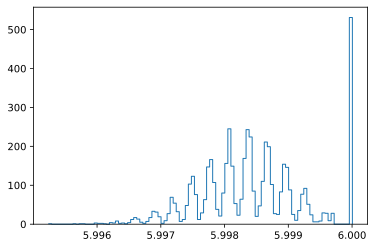

In [263]:
plt.hist(Evis_dist, bins=100, histtype='step');

In [254]:
## sampling from 100 distributions:
import random
totalPE_1MeV_gamma = [];
for ii in range(100000):
    idx = int(random.uniform(0,5000))
    totalPE_1MeV_gamma.append(random.normalvariate(mean_dist[idx], sigma_dist[idx]))
totalPE_1MeV_gamma = np.array(totalPE_1MeV_gamma)

Text(1300, 2600, 'resolution: 3.94%')

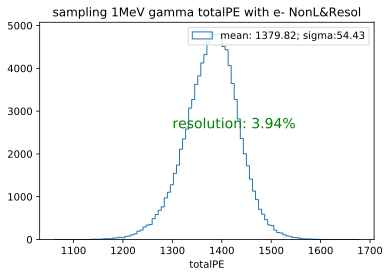

In [240]:
totalPE_1MeV_gamma = np.array(totalPE_1MeV_gamma)
plt.hist(totalPE_1MeV_gamma, histtype='step', bins=100, 
         label="mean: %.2f; sigma:%.2f" %(totalPE_1MeV_gamma.mean(), np.std(totalPE_1MeV_gamma)));
plt.legend()
plt.xlabel('totalPE')
plt.title('sampling 1MeV gamma totalPE with e- NonL&Resol')
plt.text(1300, 2600, "resolution: %.2f%%" %(np.std(totalPE_1MeV_gamma)/totalPE_1MeV_gamma.mean()*100), fontsize=14, color='green')

In [241]:
np.std(totalPE_1MeV_gamma) / totalPE_1MeV_gamma.mean()

0.03944391795373381

In [247]:
np.std(totalPE_1MeV_gamma) / totalPE_1MeV_gamma.mean()

0.02231931053606704

In [251]:
np.std(totalPE_1MeV_gamma) / totalPE_1MeV_gamma.mean()

0.012814383347594027

In [255]:
np.std(totalPE_1MeV_gamma) / totalPE_1MeV_gamma.mean()

0.009014203674450837

In [190]:
np.std(totalPE_1MeV_gamma) / totalPE_1MeV_gamma.mean()

0.012143506454886564

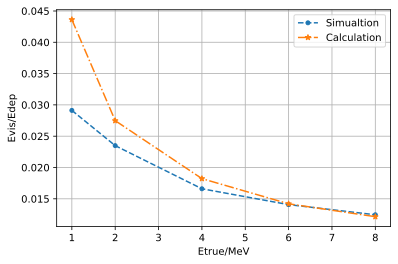

In [209]:
plt.plot([1,2,4,6,8], [0.02912, 0.02349, 0.01660, 0.01407, 0.01245], 'o--', ms=4, label='Simualtion')
plt.plot([1,2,4,6,8], [0.04362, 0.02748, 0.01822, 0.01420, 0.01214], '*-.', ms=6, label='Calculation')
plt.xlabel("Etrue/MeV"); plt.ylabel("Evis/Edep")
plt.grid(True); plt.legend()